In [1]:
#Carga del archivo asociado con las ventas para el analisis exploratorio de Premium Choice
#Creacion de un primer bloque que lea los 4 archivos de ventas por separado, genere combinaciones en un único dataframe, haga una verificacion general. 
!pip install xlrd
# 🔁 Unificación de archivos de ventas del año 2024
import pandas as pd
import os

# Lista de archivos a combinar
archivos_ventas_2024 = [
    "../data/raw/ventas_dcto_2024_1de4.xls",
    "../data/raw/ventas_dcto_2024_2de4.xls",
    "../data/raw/ventas_dcto_2024_3de4.xls",
    "../data/raw/ventas_dcto_2024_4de4.xls"
]

# Lista para almacenar los DataFrames individuales
dfs = []

# Cargar cada archivo y añadirlo a la lista
for archivo in archivos_ventas_2024:
    try:
        df_temp = pd.read_excel(archivo)
        print(f"✅ Cargado: {archivo} con shape {df_temp.shape}")
        dfs.append(df_temp)
    except Exception as e:
        print(f"❌ Error cargando {archivo}: {e}")

# Concatenar todos en uno solo
df_ventas_2024 = pd.concat(dfs, ignore_index=True)
print(f"\n🧩 DataFrame combinado shape: {df_ventas_2024.shape}")






[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
❌ Error cargando ../data/raw/ventas_dcto_2024_1de4.xls: [Errno 2] No such file or directory: '../data/raw/ventas_dcto_2024_1de4.xls'
❌ Error cargando ../data/raw/ventas_dcto_2024_2de4.xls: [Errno 2] No such file or directory: '../data/raw/ventas_dcto_2024_2de4.xls'
❌ Error cargando ../data/raw/ventas_dcto_2024_3de4.xls: [Errno 2] No such file or directory: '../data/raw/ventas_dcto_2024_3de4.xls'
❌ Error cargando ../data/raw/ventas_dcto_2024_4de4.xls: [Errno 2] No such file or directory: '../data/raw/ventas_dcto_2024_4de4.xls'


ValueError: No objects to concatenate

In [5]:
#Vista general del archivo de ventas
# 📊 Vista general del DataFrame de ventas 2024
print("📐 Dimensiones del archivo de ventas:")
print(f"Filas: {df_ventas_2024.shape[0]}, Columnas: {df_ventas_2024.shape[1]}")

print("\n📌 Columnas disponibles:")
for col in df_ventas_2024.columns:
    print(f"• {col}")

print("\n🧠 Tipos de datos:")
print(df_ventas_2024.dtypes)

print("\n👁️ Primeras filas:")
display(df_ventas_2024.head())


📐 Dimensiones del archivo de ventas:
Filas: 59011, Columnas: 16

📌 Columnas disponibles:
• cod_cliente
• cliente
• documento
• defecha
• vr_gravado
• vr_nogravado
• subtotal
• costo
• utilidadps
• utilidadpc
• iva
• total
• tipodocumento
• bodega
• vendedor
• distrito

🧠 Tipos de datos:
cod_cliente              object
cliente                  object
documento                object
defecha          datetime64[ns]
vr_gravado              float64
vr_nogravado            float64
subtotal                float64
costo                   float64
utilidadps              float64
utilidadpc              float64
iva                       int64
total                   float64
tipodocumento            object
bodega                  float64
vendedor                 object
distrito                 object
dtype: object

👁️ Primeras filas:


,cod_cliente,cliente,documento,defecha,vr_gravado,vr_nogravado,subtotal,costo,utilidadps,utilidadpc,iva,total,tipodocumento,bodega,vendedor,distrito
0,CL 100000001646,SALOMON LAMA SAS,1PCH 32706,2024-01-09,248850.0,0.0,248850.0,198755.01,50094.99,25.204,47282,296132.0,F.COMER,44.0,ALZATE ELENA,NaN
1,CL 100000001067,SUPERTIENDAS CAÑAVERAL SAS,1PCH 32707,2024-01-09,0.0,80400.0,80400.0,47056.26,33343.74,70.859,0,80400.0,F.COMER,53.0,ALZATE ELENA,INSTITUCIONAL
2,CL 100000001781,KNITTING PET SAS,1PCH 32708,2024-01-09,377444.0,0.0,377444.0,171740.52,205703.48,119.776,71714,449158.0,F.COMER,44.0,HERNANDEZ BECERRA AMANDA LUCIA,NaN
3,CL 100000001224,MAKALI S.A.S,1PCH 32709,2024-01-09,745090.0,0.0,745090.0,221969.46,523120.54,235.672,141567,886657.0,F.COMER,44.0,ALZATE ELENA,INSTITUCIONAL
4,CL 100000001626,COCOFIT MERCADO SALUDABLE S.A.S.,1PCH 32710,2024-01-09,394540.0,0.0,394540.0,141849.24,252690.76,178.140,74963,469503.0,F.COMER,44.0,HERNANDEZ BECERRA AMANDA LUCIA,INSTITUCIONAL


In [6]:
#Calidad de datos del archivo de ventas
#Identificacion de la calidad de datos del archivo de ventas asociadas a Premium Choice
# 🚨 Valores nulos
print("⚠️ Valores nulos por columna:")
print(df_ventas_2024.isnull().sum())

print("\n📉 Porcentaje de valores nulos:")
print((df_ventas_2024.isnull().mean() * 100).round(2))

# 🔁 Filas duplicadas
print("\n🔁 Filas duplicadas:")
print(df_ventas_2024.duplicated().sum())

# 🔢 Cardinalidad (valores únicos)
print("\n🔢 Cardinalidad por columna:")
print(df_ventas_2024.nunique())


⚠️ Valores nulos por columna:
cod_cliente          0
cliente              0
documento            0
defecha              0
vr_gravado           0
vr_nogravado         0
subtotal             0
costo                0
utilidadps           0
utilidadpc           0
iva                  0
total                0
tipodocumento        0
bodega              49
vendedor           127
distrito         55130
dtype: int64

📉 Porcentaje de valores nulos:
cod_cliente       0.00
cliente           0.00
documento         0.00
defecha           0.00
vr_gravado        0.00
vr_nogravado      0.00
subtotal          0.00
costo             0.00
utilidadps        0.00
utilidadpc        0.00
iva               0.00
total             0.00
tipodocumento     0.00
bodega            0.08
vendedor          0.22
distrito         93.42
dtype: float64

🔁 Filas duplicadas:
0

🔢 Cardinalidad por columna:
cod_cliente       2322
cliente            380
documento        59011
defecha            364
vr_gravado       27843
vr_nogr

In [7]:
#Identificacion de las estadisticas numericas asociadas al histórico de Premium Choice 
# 📈 Estadísticas numéricas
print("📊 Estadísticas descriptivas:")
display(df_ventas_2024.describe())


📊 Estadísticas descriptivas:


,defecha,vr_gravado,vr_nogravado,subtotal,costo,utilidadps,utilidadpc,iva,total,bodega
count,59011,5.901100e+04,5.901100e+04,5.901100e+04,5.901100e+04,5.901100e+04,59011.000000,5.901100e+04,5.901100e+04,58962.000000
mean,2024-07-07 16:27:20.317906688,2.686016e+05,2.103706e+04,2.896386e+05,1.138422e+05,1.757965e+05,9.794137,4.432098e+04,3.339596e+05,18.494776
min,2024-01-02 00:00:00,-2.047230e+07,-2.300000e+07,-2.300000e+07,-1.453689e+07,-2.300000e+07,-48.595000,-3.889737e+06,-2.436204e+07,1.000000
25%,2024-04-06 00:00:00,2.213000e+04,0.000000e+00,2.437000e+04,0.000000e+00,2.386600e+04,0.000000,0.000000e+00,2.750000e+04,4.000000
50%,2024-07-05 00:00:00,4.869700e+04,0.000000e+00,5.280700e+04,0.000000e+00,5.159700e+04,0.000000,4.328000e+03,5.850000e+04,4.000000
75%,2024-10-10 00:00:00,1.187859e+05,0.000000e+00,1.252610e+05,0.000000e+00,1.155460e+05,0.000000,1.309200e+04,1.368000e+05,44.000000
max,2024-12-31 00:00:00,1.173431e+08,1.484220e+08,1.484220e+08,8.096398e+07,1.484220e+08,541.126000,1.825957e+07,1.484220e+08,55.000000
std,NaN,1.720865e+06,7.254830e+05,1.907834e+06,9.082295e+05,1.140770e+06,29.479871,3.187796e+05,2.204961e+06,20.445529


In [8]:
#Deteccion y exploracion de outliers
#Identificacion de dato atipicos en el comportamiento de las ventaas en el horizonte de tiempo identificado para Premium Choice 
print(df_ventas_2024[df_ventas_2024['vr_gravado'] < 0])



            cod_cliente                     cliente      documento    defecha  \
2697   CL  400000000006    VENTA MOSTRADOR - P.O.S.    4NCR   3772 2024-01-17   
3373   CL  400000000006    VENTA MOSTRADOR - P.O.S.    4NCR   3775 2024-01-22   
3873   CL  200000000015    VENTA MOSTRADOR - P.O.S.    2NCR   3787 2024-01-25   
3882   CL  200000000015    VENTA MOSTRADOR - P.O.S.    2NCR   3788 2024-01-25   
5573   CL  400000000006    VENTA MOSTRADOR - P.O.S.    4NCR   3817 2024-02-05   
...                 ...                         ...            ...        ...   
59004  CL  100000000398      CENCOSUD COLOMBIA S.A.    1NCR   4637 2024-12-26   
59005          CL 10038      COUNTRY CLUB DE BOGOTA    1NCR   4639 2024-12-26   
59006  CL  100000000168            MORANGO S. A. S.    1NCR   4647 2024-12-27   
59007  CL  100000001067  SUPERTIENDAS CAÑAVERAL SAS    1NCR   4648 2024-12-28   
59010  CL  100000000398      CENCOSUD COLOMBIA S.A.    1NCR   4652 2024-12-30   

       vr_gravado  vr_nogra

<Axes: title={'center': 'Volumen de ventas por mes'}, xlabel='mes'>

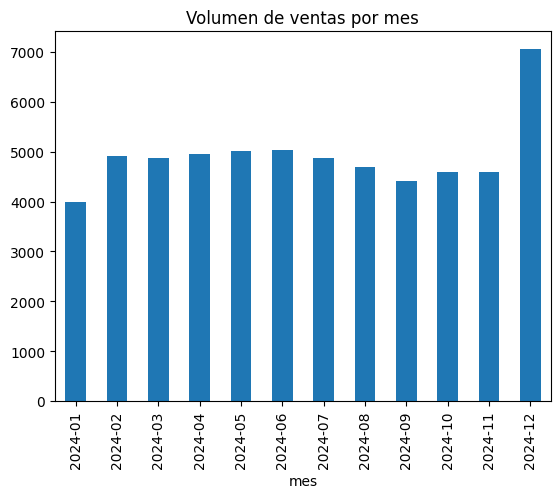

In [9]:
#Análisis de distribución temporal de los datos aplicados a Premium Choice en el segmento de ventas
df_ventas_2024['mes'] = df_ventas_2024['defecha'].dt.to_period('M')
df_ventas_2024['mes'].value_counts().sort_index().plot(kind='bar', title='Volumen de ventas por mes')


In [12]:
#Análisis de RFM Preliminar aplicado a Premium Choice 
#Identificacion del comportamiento de distribuciones y ventas con frecuencias por cliente cada mes aplicados a Premium Choice 
#Se establece la frecuencia de compras aplicada por cliente como tambien el monto total vendido por cliente 
rfm = df_ventas_2024.groupby('cliente').agg({
    'documento': 'count',
    'total': 'sum'
}).rename(columns={'documento': 'frecuencia', 'total': 'monto_total'}).sort_values('monto_total', ascending=False)
display(rfm.head(10))



,frecuencia,monto_total
cliente,,
CENCOSUD COLOMBIA S.A.,1491,5.233002e+09
VENTA MOSTRADOR - P.O.S.,51810,4.609882e+09
ALMACENES EXITO S A,318,1.793788e+09
SUPERTIENDAS CAÑAVERAL SAS,254,1.150596e+09
INVERSIONES EURO S. A.,226,7.214637e+08
SUPER A LIMITADA,93,4.833390e+08
DLK S.A.S.,680,3.841939e+08
AMORE GROUP S.A.S.,106,3.318707e+08
MERA EL DORADO S.A.S.,104,3.129696e+08


In [13]:
#Verificacion de los duplicados logicos en el comportamiento con el ciente
#Establecer la congruencia entre lo que seria los duplicados logicos (por cliente+fecha+documento)
duplicados_logicos = df_ventas_2024.duplicated(subset=['cliente', 'defecha', 'documento']).sum()
print(f"Duplicados lógicos: {duplicados_logicos}")


Duplicados lógicos: 0


In [14]:
#Verificacion de consistencias aplicadas al comportamiento de los clientes de premium choice 
#Establecer las consistencias entre el subtotal y la suma de otros valores aplicados en las ventas
df_ventas_2024['check_total'] = (df_ventas_2024['vr_gravado'] + df_ventas_2024['vr_nogravado']) - df_ventas_2024['subtotal']
df_ventas_2024['check_total'].abs().describe()  # Debería estar cerca de cero


count    5.901100e+04
mean     3.390704e-15
std      3.731859e-13
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.820766e-11
Name: check_total, dtype: float64

<Axes: title={'center': 'Total vendido por mes'}, xlabel='mes'>

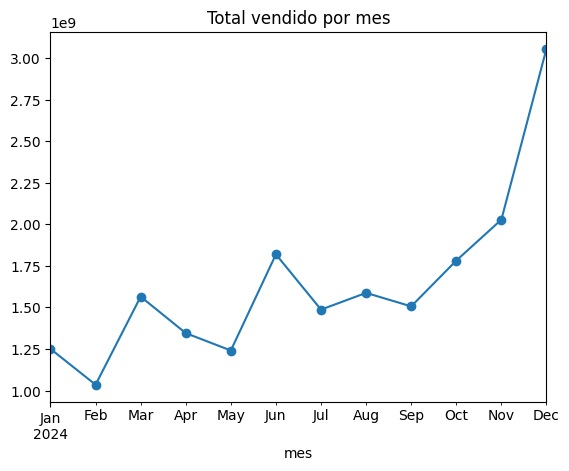

In [15]:
#Analisis temporal mas profundo de las ventas en premium choice 
#Presentacion de un analisis temporal mas profundo presentando un grafico de evolucion de ventas mensual (suma del total vendido)
df_ventas_2024.groupby('mes')['total'].sum().plot(kind='line', marker='o', title='Total vendido por mes')


In [ ]:
#Analisis por cliente mas detallado y completo asociado con Premium Choice 
#Calculo de Recency (Identificacion de cuando fue la ultima compra del cliente) Ideal para determinar que tan reciente compra el cliente
#El calculo del recency es una medida en días y tambien en meses
# Análisis por cliente más detallado y completo asociado con Premium Choice
# Cálculo de Recency (Identificación de cuándo fue la última compra del cliente) en días, semanas y meses

from datetime import datetime

fecha_max = df_ventas_2024['defecha'].max()

# Recency en días
rfm['recency_dias'] = df_ventas_2024.groupby('cliente')['defecha'].max().apply(lambda x: (fecha_max - x).days)

# Recency en semanas (división entera)
rfm['recency_semanas'] = (rfm['recency_dias'] // 7)

# Recency en meses (aproximado)
rfm['recency_meses'] = (rfm['recency_dias'] / 30).round(1)

# Mostrar los primeros 10 clientes con las tres métricas
print(rfm[['frecuencia', 'monto_total', 'recency_dias', 'recency_semanas', 'recency_meses']].head(10))



                            frecuencia   monto_total  recency_dias  \
cliente                                                              
CENCOSUD COLOMBIA S.A.            1491  5.233002e+09             1   
VENTA MOSTRADOR - P.O.S.         51810  4.609882e+09             0   
ALMACENES EXITO S A                318  1.793788e+09             5   
SUPERTIENDAS CAÑAVERAL SAS         254  1.150596e+09             1   
INVERSIONES EURO S. A.             226  7.214637e+08            14   
SUPER A LIMITADA                    93  4.833390e+08            14   
DLK S.A.S.                         680  3.841939e+08             5   
AMORE GROUP S.A.S.                 106  3.318707e+08             8   
MERA EL DORADO S.A.S.              104  3.129696e+08             8   
FARMATODO COLOMBIA S.A.             39  2.661823e+08            19   

                            recency_semanas  recency_meses  
cliente                                                     
CENCOSUD COLOMBIA S.A.               

In [17]:
#Análisis por vendedor asociado a Premium Choice 
#Identificacion de cuales vendedores estan genrando mas ventas? Esto puede usarse para establecer una estrategia de comisiones o rendimiento
df_ventas_2024.groupby('vendedor')['total'].sum().sort_values(ascending=False).head(10)


vendedor
BODEGA PRINCIPAL                    7.455111e+09
ALZATE  ELENA                       4.255401e+09
PELAEZ PARRA CLAUDIA                1.391467e+09
CAVA 125                            1.052725e+09
VENDEDOR MOSTRADOR - P.O.S.         1.036025e+09
BODEGA MEDELLIN                     9.564862e+08
GONZALEZ ACEVEDO LUISA FERNANDA     5.626711e+08
SALON 125                           5.393695e+08
MAESTRI ALVARADO VALTER GLULIANO    4.636365e+08
BODEGA CALI                         3.725925e+08
Name: total, dtype: float64